In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read data as DataFrame using pandas
data = pd.read_csv("chart2000-songmonth-0-3-0054.csv")
columns = data.columns
# checking columns in the DataFrame

In [14]:
"""
1)
A: Use DataFrame.unique() to access unique values in columns.
"""
print("Question 1: ")
print("Numbers of unique artists in the charts: " + str(len(data["artist"].unique())) + ".")
print("Numbers of unique songs in the charts: " + str(len(data["song"].unique())) + ".")
print("\n")

Question 1: 
Numbers of unique artists in the charts: 1721.
Numbers of unique songs in the charts: 2964.




In [15]:
"""
2)
a) What song has the highest one-month score of all time?
A: Calling idxmax() on DataFrame can access the index of the maximum value in a column.

b) What month was this?
A: Use previous index to get fetch this row in data, then
   specify the column as month.

c) Who was the artist?
A: Same as above, but specify the column as artist.
"""
print("Question 2: ")
highest_score_idx = data["score"].idxmax()
print("This song has the highest one-month score of all time: " + data["song"][highest_score_idx] + ".")
print("It happens in this month: " + data["month"][highest_score_idx] + ".")
artists = data["artist"][highest_score_idx]
print("The artists that produced this song: " + artists + ".")
print("\n")

Question 2: 
This song has the highest one-month score of all time: Yeah!.
It happens in this month: Apr 2004.
The artists that produced this song: Usher, Lil' Jon & Ludacris.




In [16]:
"""
3)
a) How many months was this song on the charts in the United States?
A: First fetch by checking the song's name and whether it has a position in the US chart from total data
   by DataFrame.loc[].
   Then count the length of resulting DataFrame by using len().

b) What was its peak US chart position?
A: Using DataFrame.min() to get the smallest value in the "us" column (the hightest position).

c) In what month did it achieve this peak US chart position?
A: Fetch the row containing the highest position by DataFrame.loc[], and
   fetch the first value in "month" column.
"""
print("Question 3: ")
charts_of_safe_and_sound = data.loc[(data["song"] == "Safe And Sound") & (data["us"] != "-")]
print("The song 'Safe and Sound' stayed on the chart for " + str(len(charts_of_safe_and_sound)) + " months.")

highest_pos = charts_of_safe_and_sound["us"].min()
print("Its peak US chart position was: " + str(highest_pos) + ".")

highest_pos_row = charts_of_safe_and_sound.loc[charts_of_safe_and_sound["us"] == highest_pos]
highest_pos_row = highest_pos_row.reset_index()
occured_month = highest_pos_row["month"][0]
print("The song achieved this peak in " + str(occured_month) + ".")
print("\n")

Question 3: 
The song 'Safe and Sound' stayed on the chart for 10 months.
Its peak US chart position was: 10.
The song achieved this peak in Oct 2013.




In [17]:
"""
4)
a) Which artist has spent the most time on the charts as defined by chart-months?
A: First find all unique artists entries by calling DataFrame.unique() on column "artist"
   Then create two list, one contains pairs made of an artist and its chart-months value.
   second one only contains chart-months value.
   Next, loop through the artists list by for-in, for each artist, create a temporary
   list to store the aforementioned pair.
   Using DataFrame.loc[] and len() to count the chart-months.
   Finally, append the pair and the count to corresponding list.

   To find the artist that achieved the most time on the charts, loop through the
   count list and compare each value with the maximum value. If the comparison returns
   true, use that index to find the corresponding artist, and add to the list which stores
   the required artists' names if current artist is not in the list.

b) How many chart-months have they scored?
A: Use the built-in function max() to find the maximum value of the chart count list.
"""
print("Question 4: ")
artists = data["artist"].unique()
chart_month_total = []
chart_months_per_artists = []
for artist in artists:
    temp = []
    temp.append(artist)
    temp.append(len(data.loc[data["artist"] == artist]))
    chart_months_per_artists.append(len(data.loc[data["artist"] == artist]))
    chart_month_total.append(temp)

i = 0
artists_of_most_months = []
while i < len(chart_months_per_artists):
    if chart_months_per_artists[i] == max(chart_months_per_artists):
        current_artist = chart_month_total[i][0]
        artists_of_most_months.append(current_artist)
    i += 1

print(str(artists_of_most_months[0]) + " has spend the most time on the chart.")
print("She has scored " + str(max(chart_months_per_artists)) + " months on the chart.")
print("\n")

Question 4: 
Rihanna has spend the most time on the chart.
She has scored 123 months on the chart.




In [18]:
"""
5) How many #1 hits does Drake have in Canada?
A: First select rows that belongs to Drake and the position in Canada is 1st.
   Then remove the duplicates in selected row by DataFrame.unique()
   Finally use len() to find the number of #1 hits.
"""
print("Question 5: ")
drake_data = data.loc[(data["artist"] == "Drake") & (data["ca"] == "1")]
hit_songs = drake_data["song"].unique()
print("Drake has " + str(len(drake_data)) + " #1 hits in Canada.")
print("\n")

Question 5: 
Drake has 10 #1 hits in Canada.




In [19]:
"""
6) Which Lady Gaga song on the list did not chart in Australia?
A: Similar to above solution, but the fetching requirements become Lady Gaga and - (no rank).
"""
print("Question 6: ")
gaga_data = data.loc[(data["artist"] == "Lady GaGa") & (data["au"] == "-")]
songs = gaga_data["song"].unique()
print("Here are the songs that do not have a position on the chart in Australia: ")
for i, song in enumerate(songs):
    print(str(i + 1) + ": " + song)
print("\n")

Question 6: 
Here are the songs that do not have a position on the chart in Australia: 
1: Poker Face
2: LoveGame
3: Paparazzi
4: Alejandro
5: You & I
6: Marry The Night
7: Applause




In [20]:
"""
7)
a) In what month of her career did Ariana Grande have her highest-ever number of songs
on the charts?
b) In this month, how many songs did she chart?
c) What were these songs ranked in the US, and which was the highest?

Answer for all three Qs:
   A: 1. Fetch Ariana Grande's data by DataFrame.loc[]
      2. Create a list that stores the counts of songs by month.
      3. Loop through all months in her data, and count the numbers of song appearance in each month
         by DataFrame.loc[] and len()
      4. Output the number and month by max() and .index.
      5. Fetch ranks in the computed month by DataFrame.loc[]
      6. Loop through the ranks and find corresponding song by DataFrame.loc[] again. Stored in a list.
"""
print("Question 7: ")
ariana_grande_data = data.loc[(data["artist"] == "Ariana Grande")]
months = ariana_grande_data["month"].unique()
AG_months_chart_count = []
for month in months:
    AG_months_chart_count.append(len(ariana_grande_data.loc[ariana_grande_data["month"] == month]))
highest_num_of_songs_idx = AG_months_chart_count.index(max(AG_months_chart_count))
month_of_highest_num_of_songs = months[highest_num_of_songs_idx]
print("In Ariana Grande's career, the highest number of her songs on the chart is " + str(AG_months_chart_count[highest_num_of_songs_idx])\
      + ", she achieved this in " + str(month_of_highest_num_of_songs) + ".")
print("\n")
print("In corresponding months, here are the songs' ranks: ")
ranks_month = ariana_grande_data.loc[(ariana_grande_data["month"] == month_of_highest_num_of_songs)]
ranks = ranks_month["us"]
songs = []
for rank in ranks:
    songs.append(ranks_month.loc[ranks_month["us"] == rank])
for i, song in enumerate(songs):
    print(song["song"].values[0] + ", ranked: #" + str(song["us"].values[0]) + ".")
print("\n")
print("The highest is 7 Rings, ranked 1st on the US chart.")
print("\n")

Question 7: 
In Ariana Grande's career, the highest number of her songs on the chart is 4, she achieved this in Feb 2019.


In corresponding months, here are the songs' ranks: 
7 Rings, ranked: #1.
Thank U, Next, ranked: #3.
Break Up With Your Girlfriend, I'm, ranked: #2.
Breathin, ranked: #18.


The highest is 7 Rings, ranked 1st on the US chart.




Question 8: 
These 10 artists had the most unique songs 
make the charts between 2013 and 2017.
1. Drake with 19 unique songs。
2. Rihanna with 16 unique songs。
3. Chris Brown with 14 unique songs。
4. Nicki Minaj with 14 unique songs。
5. Selena Gomez with 12 unique songs。
6. Taylor Swift with 11 unique songs。
7. Ed Sheeran with 10 unique songs。
8. Ariana Grande with 9 unique songs。
9. Jason Derulo with 9 unique songs。
10. Kendrick Lamar with 9 unique songs。


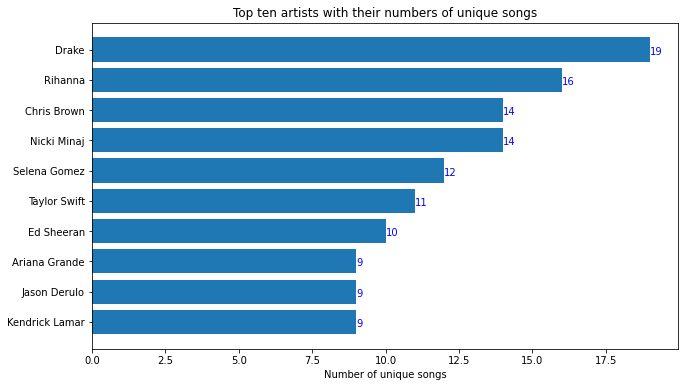

In [21]:
"""
8)
a) Which ten artists had the most unique songs make the charts between 2013 and 2017?
A: 1. Drop all duplicates first by DataFrame.drop_duplicates()
   2. Fetch all data from 2013 and 2017 by a custom loop that loops through the month column
      in the data.
   3. Fetch all artist by looping through the artist column again, then remove the duplicates
      and convert it to python list.
   4. Looping through the artist list and count each artist appearance on the table,
      record the counts in a list.
   5. Find the maximum of the count list, and use its index to find corresponding artist.
      Repeat 10 times to get the top 10 artists.
   6. Output it.

b) Make a bar graph that includes each artist and how many songs they charted. Please
label, title, and color your graph appropriately.
A: 1. Plot a horizontal bar chart, since artists' names are very long and not suitable for
   a vertical bar chart using matplotlib.
   2. Use a loop to add each count on the bar.

"""
print("Question 8: ")
data_q8 = data.drop_duplicates(["song"], keep="first", ignore_index=True)
all_months = data_q8["month"]
data_between_13_17 = []
for i, month in enumerate(all_months):
    year = int(month.split(" ")[1])
    if 2013 <= year <= 2017:
        data_between_13_17.append(data_q8.iloc[i])


artists_in_interval = []
for row in data_between_13_17:
    artists_in_interval.append(row[2])
artists_in_interval = pd.DataFrame(artists_in_interval, columns=["artist"])
artists_in_interval = artists_in_interval["artist"].unique()
artists_in_interval = artists_in_interval.tolist()

artist_counts = []
for artist in artists_in_interval:
    count = 0
    for row in data_between_13_17:
        artists = row[2]
        if artist in artists:
            count += 1
    artist_counts.append(count)

max_10_artists_and_counts = []
orig_length = len(artists_in_interval)
while orig_length - len(artists_in_interval) < 10:
    max_count = max(artist_counts)
    max_index = artist_counts.index(max_count)
    max_artist = artists_in_interval[max_index]
    max_10_artists_and_counts.append([max_artist, max_count])
    artist_counts.pop(max_index)
    artists_in_interval.pop(max_index)

print("These 10 artists had the most unique songs "
      "\nmake the charts between 2013 and 2017.")
artists_names = []
artists_count = []
for i, pair in enumerate(max_10_artists_and_counts):
    print(str(i + 1) + ". " + pair[0] + " with " + str(pair[1]) + " unique songs.")
    artists_names.append(pair[0])
    artists_count.append(pair[1])

fig, ax = plt.subplots(figsize=(10.5, 6))
y_pos = np.arange(len(artists_names))
ax.barh(y_pos, artists_count, align="center")
ax.set_yticks(y_pos)
ax.set_yticklabels(artists_names)
ax.invert_yaxis()
ax.set_xlabel("Number of unique songs")
ax.set_title("Top ten artists with their numbers of unique songs")
for i, count in enumerate(artists_count):
    ax.text(count, (i + 0.15), str(count), color="blue")
plt.show()